In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import xarray as xr
import xesmf as xe
from scipy import stats
import datetime
import analysis_utils
import pygrib
import os


# Reading in Data:
Instantiate paths 

In [2]:
"""

Valid forecast/reanalysis types are: 'CFS', 'NMME, 'SEAS', 'Berkeley', 'NCEP, ERA'

Valid modes are: 'monthly', 'seasonal'

Valid times are: ['SON', 'JJA', 'DJF', 'MAM'] (seasons)
                 and 
                 ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'] (months)
"""

forecast_dataset = xr.open_dataset(os.environ['NMME_DIR'] + 'Processed/1_month_NMME_forecast.nc')
reanalysis_dataset = xr.open_dataset(os.environ['BERKELEY_DIR'] + 'Land_and_Ocean_LatLong1.nc')
main_grid =  xr.open_dataset(os.environ['GRID_DIR'] + 'main_grid.nc')
forecast_type = 'NMME'
reanalysis_type = 'Berkeley'
forecast_start_time = '2012-01-01'
reanalysis_start_time = '1850-01-01'
frequency = 'MS'
mode = 'monthly'
time = None
lead_time = 0


In [3]:
"""
Reads in datasets, then cleans, regrids, and anomalizes them. 
Assumes forecast and reanalysis data are monthly, please restructure
if other forms of data.
"""



forecast_da, reanalysis_da = analysis_utils.read_in_dataset_and_anomalize(forecast_dataset,
                                                                reanalysis_dataset,
                                                                main_grid,
                                                                forecast_type,
                                                                reanalysis_type,
                                                                forecast_start_time,
                                                                reanalysis_start_time,
                                                                frequency,
                                                                mode,
                                                                time,
                                                                lead_time,
                                                                )

/home/omeed/Data-Science-Thesis/notebooks/Preprocessing Notebookes/analysis_utils.py:200: FutureWarning: The inplace argument has been deprecated and will be removed in a future version of xarray.
  sliced_reanalysis_ds.rename({'latitude': 'lat', 'longitude': 'lon', 'temperature': '2t'}, inplace=True)


Create weight file: nearest_s2d_181x360_94x192.nc
Create weight file: nearest_s2d_180x360_94x192.nc


# Correlation

In [4]:
"""
finding correlation between anomalized cfsv2 data and anomalized reanalysis data
"""
corr = analysis_utils.find_corr(forecast_da, reanalysis_da)

/home/omeed/Data-Science-Thesis/notebooks/Preprocessing Notebookes/analysis_utils.py:533: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  llcrnrlon=min(lons), urcrnrlat=max(lats), urcrnrlon=max(lons), resolution = 'c')


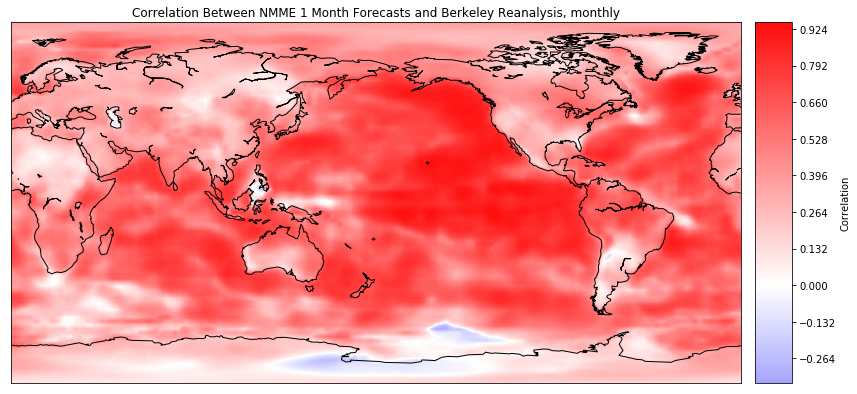

In [5]:
"""Plotting correlation"""
corr_title = 'Correlation Between '+ forecast_type + ' 1 Month Forecasts and ' + reanalysis_type + ' Reanalysis, ' + mode #+' for ' + time
analysis_utils.plot_global(corr, main_grid['lat'], main_grid['lon'], corr_title, 'Correlation', -1, 1, 'bwr')

In [6]:
"""
Get Correlation at Lat/Lon point
"""

analysis_utils.get_corr_lat_lon(corr, 1.693951, 38.023802)

<xarray.DataArray '2t' ()>
array(0.739254)
Coordinates:
    lon      float32 37.5
    lat      float32 0.952368

# RMSE
Below is also a portion on plotting RMSE 

In [7]:
"""Finding the RMSE between CFSv2 and Reanalysis by lat/lon point"""
rmse = analysis_utils.find_rmse(forecast_da, reanalysis_da, 0)

/home/omeed/Data-Science-Thesis/notebooks/Preprocessing Notebookes/analysis_utils.py:533: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  llcrnrlon=min(lons), urcrnrlat=max(lats), urcrnrlon=max(lons), resolution = 'c')


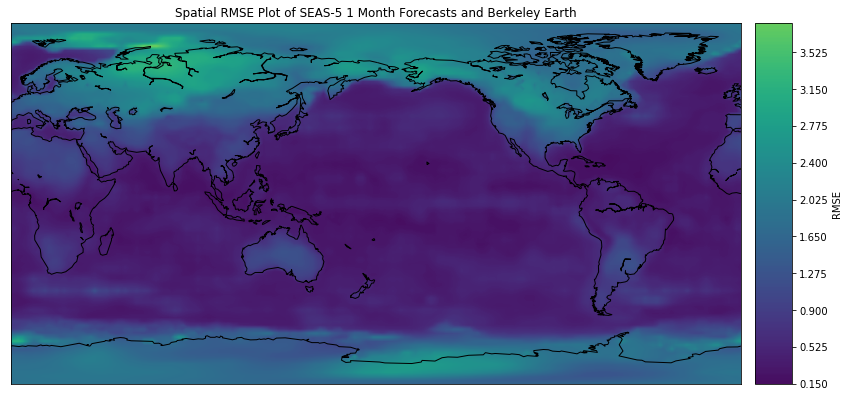

In [8]:
"""
Spatial plot of RMSE between forecast and Reanalysis 
"""
s_rmse_title = 'Spatial RMSE Plot of SEAS-5 1 Month Forecasts and Berkeley Earth'
analysis_utils.plot_global(rmse, reanalysis_da['lat'], reanalysis_da['lon'], s_rmse_title, 'RMSE', 0, 5, 'viridis')

In [9]:
"Finding the RMSE between CFSv2 and Reanalysis by month"
ts_rmse = analysis_utils.find_rmse(forecast_da, reanalysis_da, (1,2))

/home/omeed/anaconda3/envs/ClimateAI/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


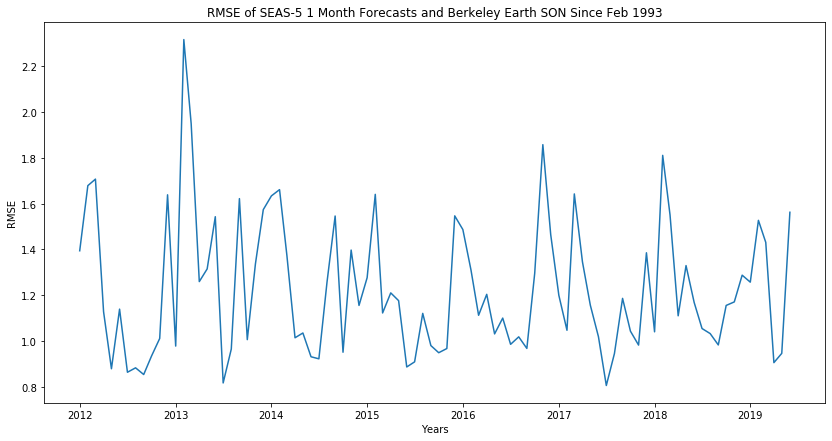

In [10]:
"""
Time series plot of RMSE between CFSv2 and Reanalysis 2 
"""

plt.figure(figsize=(14,7))
plt.plot(forecast_da['time'], ts_rmse)
plt.xlabel('Years')
plt.ylabel('RMSE')
ts_rmse_title = 'RMSE of SEAS-5 1 Month Forecasts and Berkeley Earth SON Since Feb 1993'
plt.title(ts_rmse_title)
#plt.savefig('output/' + ts_rmse_title)
plt.show()